In [2]:
%%capture
%run ./read_data.ipynb

references: https://www.kaggle.com/code/malikashrestha/knn-regression-new

### K-Nearest Neighbors (KNN)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [4]:

knn_rgs = KNeighborsRegressor(n_neighbors=1, n_jobs=-1)
knn_rgs.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=1)

In [5]:
train_test_report(knn_rgs)

Train score: 		         0.9982
Test score: 		         0.9321


<Figure size 432x288 with 0 Axes>

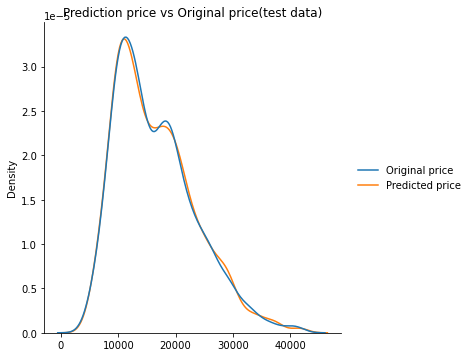

In [6]:
plot_prediction_compare_ori(knn_rgs, title="Prediction price vs Original price(test data)")

<Figure size 432x288 with 0 Axes>

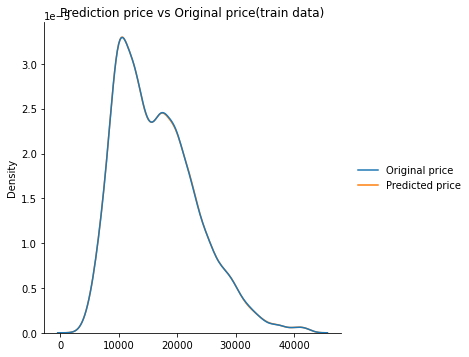

In [7]:
plot_prediction_compare_ori(knn_rgs, X_train, y_train, title="Prediction price vs Original price(train data)")

In [8]:
cv_score = cross_val_score(knn_rgs, X, y, cv=10)
cv_score_report(cv_score)

Cross validation score: [0.75807891 0.91642372 0.89977919 0.87010226 0.74672153 0.89331542
 0.92349187 0.73060007 0.71787303 0.7156186 ]
Mean cross validation score: 0.8172004608884766
Standard deviation cross validation score: 0.08526519311348696


In [9]:
scores = []
for k in range(1,15,2):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(cross_val_score(model, X, y, cv=5).mean() )
scores

[0.8273490446594691,
 0.8603422184855984,
 0.866120596977277,
 0.8672626154933398,
 0.8661995930583201,
 0.8649658579240924,
 0.863554106587712]

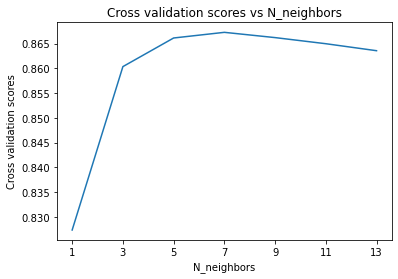

In [10]:
plt.plot([1,3,5,7,9,11,13],scores)
plt.xticks([1,3,5,7,9,11,13])
plt.xlabel('N_neighbors')
plt.ylabel('Cross validation scores')
plt.title('Cross validation scores vs N_neighbors')
plt.show()  


In [11]:
tuned_knn =  KNeighborsRegressor(n_neighbors=7)
tuned_knn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=7)

In [12]:
train_test_report(tuned_knn)

Train score: 		         0.9623
Test score: 		         0.9482


<Figure size 432x288 with 0 Axes>

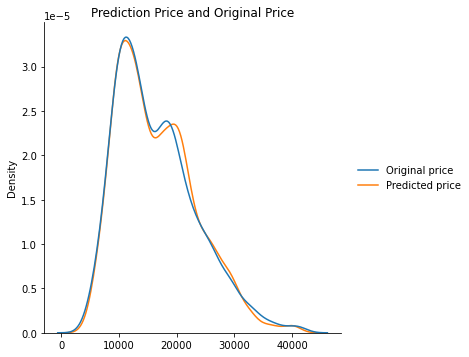

In [13]:
plot_prediction_compare_ori(tuned_knn)

In [14]:
regression_report_compare_model(knn_rgs, tuned_knn)

Before tuning hyperparameter: 

Accuracy score: 			         0.9321
R-squared score: 			         0.9321
Mean Absolute Error(MAE): 		      1209.3712
Mean Squared Error (MSE): 		   3294855.4275
Root Mean Squared Error (RSME): 	      1815.1737
-------------------------------------------------------
After tuning hyper parameter: 

Accuracy score: 			         0.9483
R-squared score: 			         0.9482
Mean Absolute Error(MAE): 		      1075.7992
Mean Squared Error (MSE): 		   2510493.7686
Root Mean Squared Error (RSME): 	      1584.4538
